In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plot
import matplotlib.pyplot as plt

In [29]:
tDB = pd.read_csv('../Data/PJT002_train.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
tDB

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
0,133759,2015-10-03 02:33:46,NaN,NaN,3,112.8600,112.8600,200.00,NaN,1.0,...,N,129,0,0,809,2453,17664,83,0,N
1,96248,2016-11-13 17:05:57,업무시설,철근콘크리트구조,3,721.8200,1109.5400,0.00,1.9881e+07,5.0,...,N,27,5,1,1731,2561,18136,50,0,N
2,71317,2016-11-21 12:46:36,단독주택,블록구조,4,47.0600,47.0600,288.00,1.96501e+07,1.0,...,N,273,0,0,825,3964,14944,270,1,N
3,86638,2016-11-07 02:50:14,위험물저장및처리시설,벽돌구조,2,171.4500,176.6400,1379.00,2.00201e+07,2.0,...,N,109,0,0,1264,2572,15104,132,0,N
4,97748,2014-01-28 16:36:43,NaN,NaN,4,0.0000,0.0000,0.00,NaN,NaN,...,N,739,0,0,10241,100127,5000,5004,0,N
5,124960,2016-11-03 09:25:00,공동주택,철근콘크리트구조,15,30351.4800,316147.1200,0.00,2.00009e+07,200.0,...,N,180,0,0,1306,2145,18462,151,0,Y
6,117245,2016-11-26 16:47:00,위험물저장및처리시설,철근콘크리트구조,3,114.1500,337.6100,951.00,1.98312e+07,2.0,...,N,102,0,1,211,2643,17388,78,1,Y
7,128704,2014-01-12 15:36:00,단독주택,블록구조,3,81.2100,81.2100,334.00,1.97201e+07,1.0,...,N,71,2,0,1172,1458,19649,78,0,Y
8,69465,2014-01-24 18:05:00,단독주택,블록구조,1,61.9500,61.9500,115.00,2.00612e+07,1.0,...,N,177,0,0,1888,2758,17916,105,0,Y
9,85144,2014-01-18 11:00:03,단독주택,벽돌구조,1,158.5700,254.5300,340.00,2.01009e+07,2.0,...,N,222,0,0,58,3830,14479,103,6,N


In [31]:
tDB = tDB[['id', 'dt_of_fr', 'bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar'
           , 'jmk', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn']]

In [32]:
tDB['year']= tDB['dt_of_fr'].apply(lambda x : str(x).split('-')[0]) 
tDB['month']= tDB['dt_of_fr'].apply(lambda x: str(x).split('-')[1])
tDB['date_time']= tDB['dt_of_fr'].apply(lambda x : str(x).split('-')[2])
tDB['date'] = tDB['date_time'].apply(lambda x : x.split(' ')[0])
tDB['time'] = tDB['date_time'].apply(lambda x : x.split(' ')[1])


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [33]:
tDB['fr_yn'].unique()

array(['N', 'Y'], dtype=object)

## Columns 

    ID :              아이디
    dt_of_fr :        화재발생일시
    fr_yn :           화재발생여부
    bldng_us :        건물용도
    bldng_archtctr :  건물구조
    bldng_cnt:        건물채수
    bldng_ar :        건물건축면적
    ttl_ar :          건물연면적(건물층별합계전체 면적)
    lnd_ar :          토지면적
    dt_of_arthrztn :  건물승인일자
    ttl_grnd_flr :    건물들의 지상 층수의 합
    ttl_dwn_fr :      건물들의 지하 층수의 합
    bldng_us_ :       건물용도분류명
    tmprtr :          온도(c)
    prcpttn :         강수량
    wnd_spd :         풍속
    wnd_drctn :       풍향
    hmdt :            습도
    ele_engry_us_201401 : 전기 에너지 사용량(2014월1월)
    gas_engry_us_201401 : 가스 에너지 사용량(2014월1월)

    lw_13101010 : 복도,계단,출입구의 성능 유지여부(0~5)
    lw_13101110 : 옥상광장의 피난성능 유지여부(0~5)
    lw_13101210 : 방화문, 방화셔터 등의 성능 유지여부(0~5)
    lw_13101211 : 방화구획 적합 여부(0~5)
    lw_13101310 : 경계벽 및 칸막이벽의 변경 등 방화성능 유지여부(0~5)
    lw_13101410 : 배연설비의 성능 유지여부(0~5)
    lw_13111010 : 내화구조의 성능 유지여부(0~5)
    lw_13111110 : 방화벽의 성능 유지여부(0~5)
    lw_13121010 : 외벽의 성능 유지여부(0~5)
    lw_13121011 : 창호의 성능 유지여부(0~5)
    lw_13131010 : 내부마감의 방화성능 유지여부(0~5)
    lw_13131110 : 외부마감의 노후화 및 마감재 탈락 여부(0~5)
    lw_13141010 : 지하층의 소방설비 성능 유지여부(0~5)
    lw_13141011 : 지하층 피난구,피난계단의 성능 유지여부(0~5)

    jmk:          지적상 지목
    rgnl_ar_nm :  용도지역지구명
    rgnl_ar_nm2 : 용도지역지구명2
    lnd_us_sttn_nm : 토지이용상황명
    rd_sd_nm :    도로측면명
    emd_nm :      행정구역명
    hm_cnt :      행정구역 인구
    fr_sttn_dstnc_119 : 안전센터와의 거리
    bldng_ar_prc : 단위 면적당 건물 가격
    fr_wthr_fclt_dstnc : 소방용수시설(소화전 등)과의 거리
    fr_mn_cnt : 관할 소방서 인원
    mlt_us_yn : 다중이용시설 포함여부
    cctv_dstnc : 공공 CCTV와의 최소 거리
    cctv_in_100m : 100m 이내 공공 CCTV
    fr_wthr_fclt_in_100m : 100m 이내 소방용수 시설 수
    tbcco_trl_str_dstnc : 담배 소매점과의 최소 거리
    sft_emrgnc_bll_dstnc : 안전 비상벨과의 최소 거리
    ahsm_dstnc : 자동 심장 충격기와의 최소 거리
    no_tbc_zn_dstnc : 금연구역과의 최소 거리
    bldng_cnt_in_50m : 반경 50M 이내의 건물 수

In [34]:
tDB_y = tDB[tDB['fr_yn'] == 'Y']
tDB_n = tDB[tDB['fr_yn'] == 'N']

In [40]:
pd.Series(sorted(tDB['jmk'].unique()))

0     공
1     과
2     구
3     답
4     대
5     도
6     목
7     묘
8     사
9     수
10    양
11    원
12    유
13    임
14    잡
15    장
16    전
17    제
18    종
19    주
20    차
21    창
22    천
23    철
24    체
25    학
dtype: object

In [41]:
tDB.iloc[:,1:].corr()

,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,fr_sttn_dstnc,fr_wthr_fclt_dstnc,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
bldng_cnt,1.000000,0.530414,0.189012,0.443320,0.009314,-0.014234,0.010925,-0.066528,-0.051694,0.019226,-0.011281,-0.003087,0.029456,-0.048917
bldng_ar,0.530414,1.000000,0.329309,0.604804,-0.029663,-0.005821,-0.011676,-0.014838,-0.008633,-0.031150,-0.024136,0.034578,-0.014944,-0.009598
ttl_ar,0.189012,0.329309,1.000000,0.230771,-0.020504,-0.011536,-0.011232,-0.006543,0.004590,-0.022649,-0.017894,0.026339,-0.015214,-0.003122
lnd_ar,0.443320,0.604804,0.230771,1.000000,-0.004147,-0.005827,-0.000384,-0.003896,-0.002267,-0.007256,0.002419,-0.003103,-0.004577,0.000704
fr_sttn_dstnc,0.009314,-0.029663,-0.020504,-0.004147,1.000000,0.070991,0.363127,-0.237448,-0.220333,0.588492,0.317828,0.057742,0.178793,-0.284051
fr_wthr_fclt_dstnc,-0.014234,-0.005821,-0.011536,-0.005827,0.070991,1.000000,0.098490,0.076436,-0.285666,0.137121,-0.020920,-0.272471,0.001452,0.033513
cctv_dstnc,0.010925,-0.011676,-0.011232,-0.000384,0.363127,0.098490,1.000000,-0.188067,-0.155715,0.237320,0.320343,-0.114840,0.101578,-0.148197
cctv_in_100m,-0.066528,-0.014838,-0.006543,-0.003896,-0.237448,0.076436,-0.188067,1.000000,0.246822,-0.229323,-0.134099,0.001951,-0.166905,0.212812
fr_wthr_fclt_in_100m,-0.051694,-0.008633,0.004590,-0.002267,-0.220333,-0.285666,-0.155715,0.246822,1.000000,-0.227256,-0.040182,0.072657,-0.108722,0.239189
tbc_rtl_str_dstnc,0.019226,-0.031150,-0.022649,-0.007256,0.588492,0.137121,0.237320,-0.229323,-0.227256,1.000000,0.394310,-0.017208,0.210352,-0.267521


In [45]:
plt.figure(figsize=(13,13))
sns.heatmap(data = tDB.iloc.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

AttributeError: '_iLocIndexer' object has no attribute 'corr'

<Figure size 936x936 with 0 Axes>

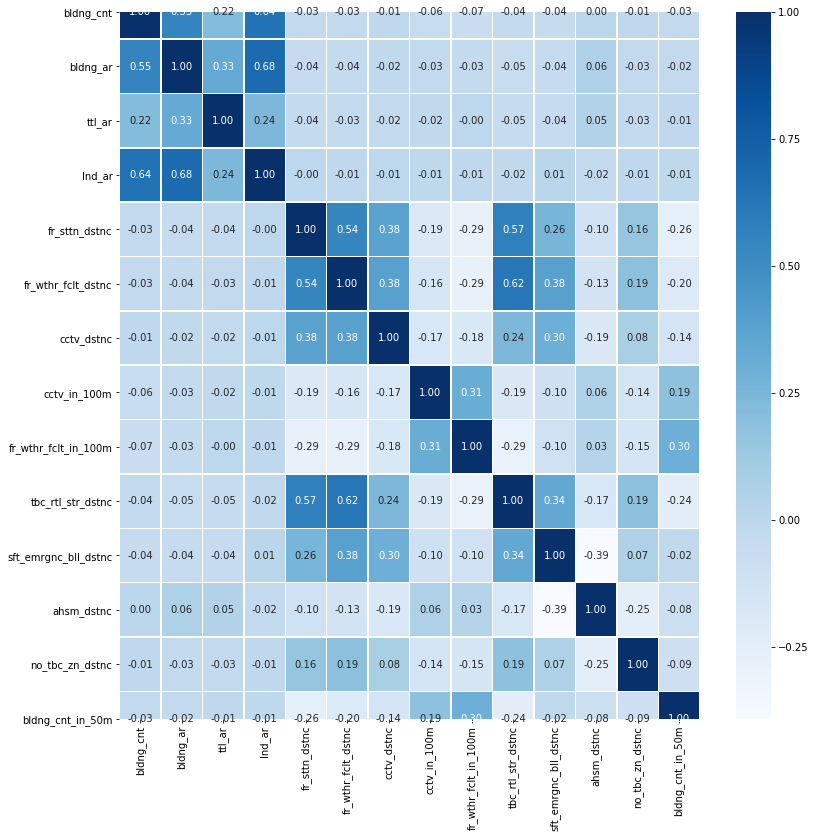

In [43]:
plt.figure(figsize=(13,13))
sns.heatmap(data = tDB_y.iloc[:,1:].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

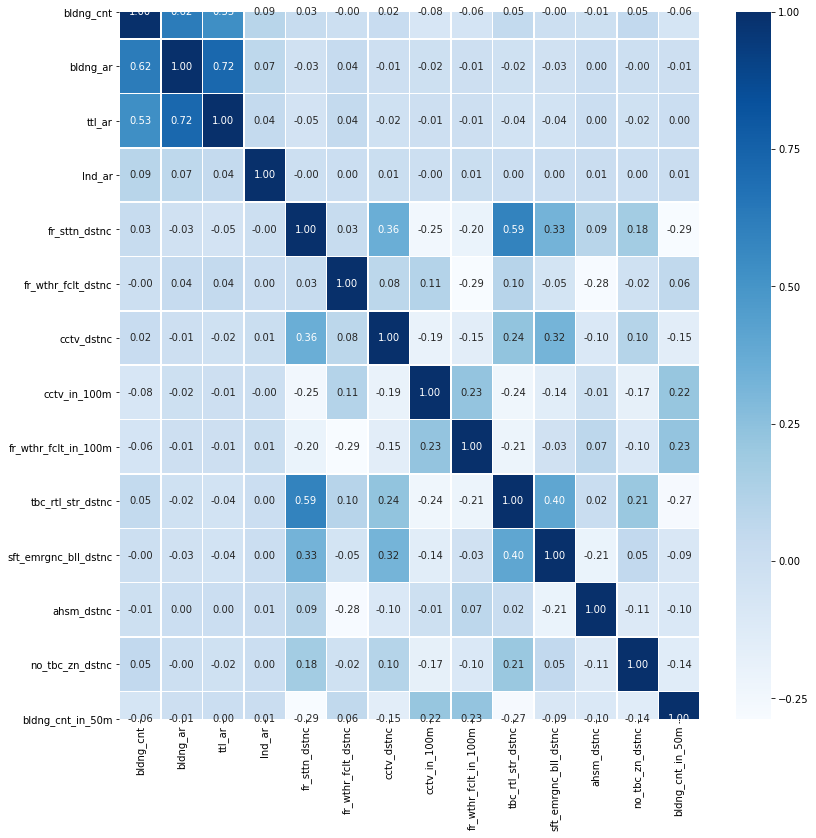

In [44]:
plt.figure(figsize=(13,13))
sns.heatmap(data = tDB_n.iloc[:,1:].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Yearly 비교


In [7]:
y_count = tDB.groupby('year').count().reset_index()[['year', 'id']]
y_count = y_count.rename(columns = {'id':'count'})
y_count

,year,count
0,2014,11724
1,2015,12036
2,2016,11885
3,2017,11801
4,2018,11753


In [8]:
%matplotlib inline

(11000, 12500)

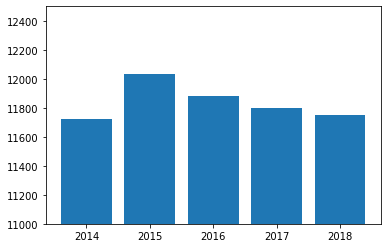

In [9]:
plt.bar(x = 'year', height='count', data = y_count)
plt.ylim(11000, 12500)


---

# Monthly 비교
> 계절별 비교로 나눠 할 수 있겠음

In [10]:
m_count = tDB.groupby('month').count().reset_index()[['month', 'id']]
m_count = m_count.rename(columns = {'id':'count'})
m_count

,month,count
0,01,5080
1,02,5056
2,03,5082
3,04,4993
4,05,4902
5,06,4788
6,07,4781
7,08,4802
8,09,4711
9,10,4978


(4400, 5500)

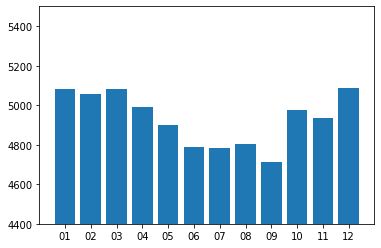

In [11]:
plt.bar(x = 'month', height='count', data = m_count)
plt.ylim(4400, 5500)

---
# 날짜별 비교
 
 > 요일별 비교가 더 나을 듯

In [12]:
d_count = tDB.groupby('date').count().reset_index()[['date', 'id']]
d_count = d_count.rename(columns = {'id':'count'})

<BarContainer object of 31 artists>

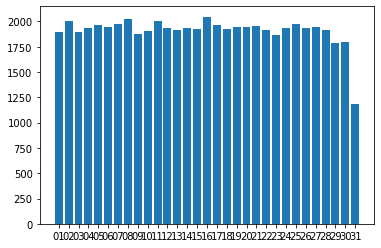

In [13]:
plt.bar(x = 'date', height='count', data = d_count)

---
# 시간대별 비교

In [25]:
a = tDB['time'].reset_index()
a['time'] = a['time'].apply(lambda x : x[:2])

0        02
1        17
2        12
3        02
4        16
         ..
59194    10
59195    17
59196    08
59197    03
59198    21
Name: time, Length: 59199, dtype: object

In [27]:
time_line = sorted(a['time'])

(2000, 2750)

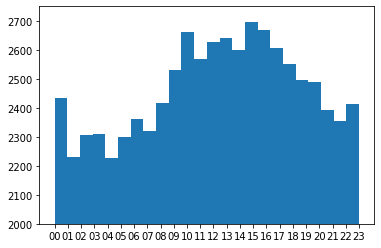

In [31]:
plt.hist(time_line, bins = 24)
plt.ylim(2000, 2750)